In [12]:
#!pip install vaderSentiment

In [3]:
import pandas as pd

In [49]:
df = pd.read_csv('./data/tweets.csv')

In [50]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [51]:
analyzer = SentimentIntensityAnalyzer()

def vader_score(tweet):

    vs = analyzer.polarity_scores(tweet)
    compound = vs.get('compound')
    
    SENTIMENT = 0
    if compound <= -0.05:
        SENTIMENT = -1
    elif compound >= 0.05:
        SENTIMENT = 1
    
    return SENTIMENT
        
    
    

In [22]:
df['auto_sentiment'] = df['text'].apply(vader_score)

In [23]:
df.to_csv('auto_tweets.csv', index=False)

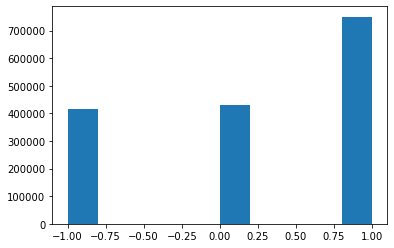

In [47]:
ax = df['auto_sentiment'].hist(bins=10, align='mid')
ax.grid(False)


In [48]:
df['auto_sentiment'].unique()

array([ 0, -1,  1])

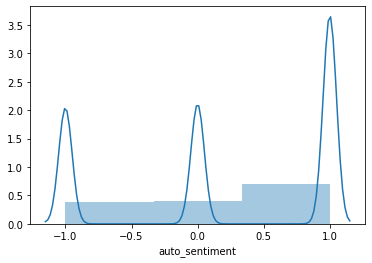

In [46]:
sns.distplot(sentiment)